In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
import os
import glob
import madmom
import matplotlib.patches as mpatches
import librosa
import librosa.display

from essentia import *
from essentia.standard import *

In [27]:
filename = "samples/perc/ratchet__long_forte_roll.mp3"
audio = MonoLoader(filename=filename, sampleRate=44100)()

def extractor(audio):
    # load our audio into an array

    # create the pool and the necessary algorithms
    pool = Pool()
    w = Windowing()
    spec = Spectrum()
    flatness = Flatness()
    flatnessDB = FlatnessDB()
    mfcc = MFCC(numberCoefficients=13)

    # compute the centroid for all frames in our audio and add it to the pool
    for frame in FrameGenerator(audio, frameSize = 1024, hopSize = 512):
        s = spec(w(frame))
        f = flatness(s)
        fDB = flatnessDB(s)
        m_bands, m_coeffs = mfcc(s)
        pool.add('flatness', f)
        pool.add('flatnessDB', fDB)
        pool.add('mfcc', m_coeffs)

    # aggregate the results
    aggrpool = PoolAggregator(defaultStats = [ 'mean', 'stdev' ])(pool)

    return pool["mfcc"]

#Get y and sr
y, sr = audio, 44100

mfcc = extractor(audio)
print mfcc

[[ -1.13842004e+03   1.14440918e-05  -6.10351562e-05 ...,  -2.67028809e-05
   -3.05175781e-05  -3.81469727e-05]
 [ -1.13842004e+03   1.14440918e-05  -6.10351562e-05 ...,  -2.67028809e-05
   -3.05175781e-05  -3.81469727e-05]
 [ -1.13592212e+03   3.52051926e+00   3.48446655e+00 ...,   2.44527054e+00
    2.24526978e+00   2.03672791e+00]
 ..., 
 [ -1.13493579e+03   4.92368698e+00   4.91220093e+00 ...,   4.55233383e+00
    4.47480011e+00   4.39034271e+00]
 [ -1.13672070e+03   2.40140915e+00   2.39575195e+00 ...,   2.22024918e+00
    2.18244171e+00   2.14123535e+00]
 [ -1.13842004e+03   1.14440918e-05  -6.10351562e-05 ...,  -2.67028809e-05
   -3.05175781e-05  -3.81469727e-05]]


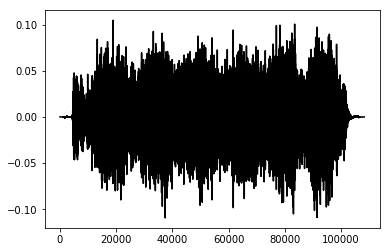

In [30]:
plt.plot(audio, color="k")
plt.savefig("waveform.png")
plt.show()

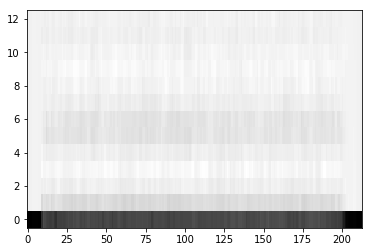

In [31]:
plt.imshow(mfcc.T, origin="lower", aspect="auto", cmap="gray")
plt.savefig("mfcc.png")
plt.show()